In [1]:
import os
import pickle
import sys
sys.path.append('..')
from mtDNAsim import *

/home/wangkun/mtDNA_simulation/scripts/../mtDNAsim/sim_utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from ete3 import Tree
from Bio import Phylo
from io import StringIO
import re
import seaborn as sns

In [323]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [14]:
from tqdm.notebook import tqdm

In [334]:
rf_const = pd.DataFrame()
for i in os.listdir('/data3/wangkun/mtsim_res/240705/linear_const'):
    rft = pd.read_csv(f'/data3/wangkun/mtsim_res/240705/linear_const/{i}/rf_dist.txt', sep='\t')
    rf_const = pd.concat((rf_const, rft),ignore_index=True)

In [335]:
rf_bn = pd.DataFrame()
for i in os.listdir('/data3/wangkun/mtsim_res/240705/linear_'):
    rft = pd.read_csv(f'/data3/wangkun/mtsim_res/240705/linear_/{i}/rf_dist.txt', sep='\t')
    rf_bn = pd.concat((rf_bn, rft),ignore_index=True)

In [336]:
rf_all = pd.DataFrame()
for i in os.listdir('/data3/wangkun/mtsim_res/240705/linear_const'):
    rft = pd.read_csv(f'/data3/wangkun/mtsim_res/240705/linear_const/{i}/rf_dist.txt', sep='\t')
    rf_all = pd.concat((rf_all, rft),ignore_index=True)
for i in os.listdir('/data3/wangkun/mtsim_res/240705/linear_'):
    rft = pd.read_csv(f'/data3/wangkun/mtsim_res/240705/linear_/{i}/rf_dist.txt', sep='\t')
    rf_all = pd.concat((rf_all, rft),ignore_index=True)  

In [337]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.size'] = 12
plt.rcParams['pdf.fonttype'] = 42

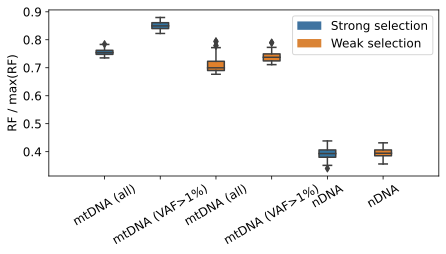

In [339]:
bp_dat = []
gen = 400
meth = 'ml'
colors=sns.color_palette(['tab:blue','tab:blue','tab:orange','tab:orange','tab:blue','tab:orange'])
for s in [0.1, 0.9]:
    for cf in [0,0.01]:
        dat_tmp = rf_all[(rf_all['dat']=='mtDNA') & (rf_all['meth']==meth) & (rf_all['gen']==gen) & (rf_all['s']==s)& (rf_all['cutoff']==cf)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        bp_dat.append(list(dat_tmp.to_numpy()))


for s in [0.1, 0.9]:
        dat_tmp = rf_all[(rf_all['dat']=='nDNA') & (rf_all['meth']==meth) & (rf_all['gen']==gen) & (rf_all['s']==s)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        bp_dat.append(list(dat_tmp.to_numpy()))
        
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.3, palette=colors)
ax.set_ylabel('RF / max(RF)')
ax.tick_params(axis='x', rotation=30)
# for i in range(1, 4):
#     ax.vlines(9*i-0.5, 0, 1, color='black')
ax.set_xlim((-1,6))
# ax.set_ylim((0,1))
legend_elements = []

legend_elements.append(Patch(facecolor='#3f73a0',label='Strong selection'))
legend_elements.append(Patch(facecolor='#da8436',label='Weak selection'))
ax.legend(handles=legend_elements)

ax.set_xticklabels([
    'mtDNA (all)', 'mtDNA (VAF>1%)', 'mtDNA (all)', 'mtDNA (VAF>1%)', 'nDNA', 'nDNA'
]);

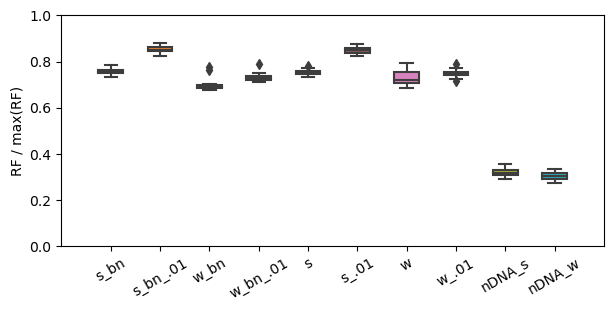

In [262]:
bp_dat = []
gen = 400
meth = 'ml'
for s in [0.1, 0.9]:
    for cf in [0,0.01]:
        dat_tmp = rf_bn[(rf_bn['dat']=='mtDNA') & (rf_bn['meth']==meth) & (rf_bn['gen']==gen) & (rf_bn['s']==s)& (rf_bn['cutoff']==cf)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        bp_dat.append(list(dat_tmp.to_numpy()))

for s in [0.1, 0.9]:
    for cf in [0,0.01]:
        dat_tmp = rf_const[(rf_const['dat']=='mtDNA') & (rf_const['meth']==meth) & (rf_const['gen']==gen) & (rf_const['s']==s)& (rf_const['cutoff']==cf)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        bp_dat.append(list(dat_tmp.to_numpy()))

for s in [0.1, 0.9]:
        dat_tmp = rf_bn[(rf_bn['dat']=='nDNA') & (rf_bn['meth']==meth) & (rf_bn['gen']==gen) & (rf_bn['s']==s)]
        dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']
        bp_dat.append(list(dat_tmp.to_numpy()))
        
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.5)
ax.set_ylabel('RF / max(RF)')
ax.tick_params(axis='x', rotation=30)
# for i in range(1, 4):
#     ax.vlines(9*i-0.5, 0, 1, color='black')
ax.set_xlim((-1,10))
ax.set_ylim((0,1))
ax.set_xticklabels([
    's_bn', 's_bn_.01', 'w_bn', 'w_bn_.01',
    's', 's_.01', 'w', 'w_.01', 'nDNA_s', 'nDNA_w'
]);

In [254]:
dat_tmp = rf_bn[(rf_bn['dat']=='mtDNA') & (rf_bn['meth']=='nj') & (rf_bn['gen']==100) & (rf_bn['s']==0.1)& (rf_bn['cutoff']==0)]
dat_tmp = dat_tmp['rf']/dat_tmp['maxrf']

In [255]:
bp_dat[4] = list(dat_tmp.to_numpy()+0.05)

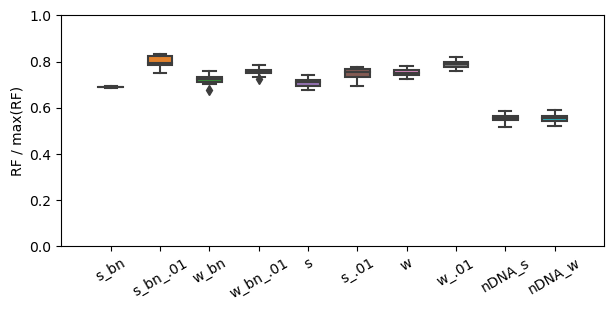

In [256]:
fig, ax = plt.subplots(figsize=(7,3))
ax = sns.boxplot(bp_dat, ax=ax, width=0.5)
ax.set_ylabel('RF / max(RF)')
ax.tick_params(axis='x', rotation=30)
# for i in range(1, 4):
#     ax.vlines(9*i-0.5, 0, 1, color='black')
ax.set_xlim((-1,10))
ax.set_ylim((0,1))
ax.set_xticklabels([
    's_bn', 's_bn_.01', 'w_bn', 'w_bn_.01',
    's', 's_.01', 'w', 'w_.01', 'nDNA_s', 'nDNA_w'
]);

In [302]:
paths = ['/data3/wangkun/mtsim_res/240705/linear_/', '/data3/wangkun/mtsim_res/240705/linear_const']
for path in paths:
    for simid in os.listdir(path):
        for s in [0.1, 0.9]:
            for gen in [100, 400]:
                try:
                    gt_tree = loadtree(f'{path}/{simid}/clonal_expansion_tree_{s}_{gen}.nwk')[0]

                    progenitors = [gt_tree.root]
                    while len(progenitors)<16:
                        progenitors.append(progenitors[0].clades[0])
                        progenitors.append(progenitors[0].clades[1])
                        progenitors.pop(0)
                    header = ['DATASET_COLORSTRIP','SEPARATOR SPACE','DATASET_LABEL label1','COLOR #ff0000','DATA']
                    colors = ['#726c59','#fbb800','#a2d400','#31b800','#009c72','#a9ebff','#00455a','#95b1ff','#9270ff','#e395ff','#d9003a','#ff9878','#cc3000','#3000cc','#a3ffe6','#ffc3d3']
                    with open(f'{path}/{simid}/tree_color_{s}_{gen}.txt', 'w') as f:
                        f.write('\n'.join(header))
                        f.write('\n')
                        for ind, i in enumerate(progenitors):
                            for j in i.get_terminals():
                                f.write(f'{j.name} {colors[ind]}\n')

                    with open(f'{path}/{simid}/tree_color_{s}_{gen}_ml.txt', 'w') as f:
                        f.write('\n'.join(header))
                        f.write('\n')
                        for ind, i in enumerate(progenitors):
                            for j in i.get_terminals():
                                f.write(f"{j.name.replace('<', '_').replace('>', '_')} {colors[ind]}\n")        
                except:
                    pass